# [Paris Saclay Center for Data Science](http://www.datascience-paris-saclay.fr)


## [Kaggle Seguro RAMP](http://www.ramp.studio/problems/kaggle_seguro): Kaggle Porto-Seguro safe driver prediction

_Balázs Kégl (LAL/CNRS)_

## Introduction
This is a [Kaggle data challenge](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) on predicting the probability that a driver will initiate an auto insurance claim in the next year.

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.19.0  
* scikit-learn>=0.19   

In [51]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 999

## Exploratory data analysis

### Loading the data

The repo contains mock data in `/data`, simulating the format of the official Kaggle data, but smaller in size and containing random features. If you want to execute the notebook on the official Kaggle data, sign up to the [challenge](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction), download `train.7z` and `test.7z`, unzip them and place them in `kaggle_data/`. If you want to use the starting kit to generate output in the right Kaggle submission format, you will also need to download `sample_submission.7z`, unzip it, and place it in `kaggle_data/`.

In [52]:
train_filename = 'kaggle_data/train.csv'

In [53]:
data = pd.read_csv(train_filename)

In [54]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [55]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [56]:
data.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [57]:
data.count()

id                595212
target            595212
ps_ind_01         595212
ps_ind_02_cat     595212
ps_ind_03         595212
ps_ind_04_cat     595212
ps_ind_05_cat     595212
ps_ind_06_bin     595212
ps_ind_07_bin     595212
ps_ind_08_bin     595212
ps_ind_09_bin     595212
ps_ind_10_bin     595212
ps_ind_11_bin     595212
ps_ind_12_bin     595212
ps_ind_13_bin     595212
ps_ind_14         595212
ps_ind_15         595212
ps_ind_16_bin     595212
ps_ind_17_bin     595212
ps_ind_18_bin     595212
ps_reg_01         595212
ps_reg_02         595212
ps_reg_03         595212
ps_car_01_cat     595212
ps_car_02_cat     595212
ps_car_03_cat     595212
ps_car_04_cat     595212
ps_car_05_cat     595212
ps_car_06_cat     595212
ps_car_07_cat     595212
ps_car_08_cat     595212
ps_car_09_cat     595212
ps_car_10_cat     595212
ps_car_11_cat     595212
ps_car_11         595212
ps_car_12         595212
ps_car_13         595212
ps_car_14         595212
ps_car_15         595212
ps_calc_01        595212


In [58]:
np.unique(data['target'])

array([0, 1])

In [59]:
data.groupby('target').count()[['id']]

,id
target,
0,573518
1,21694


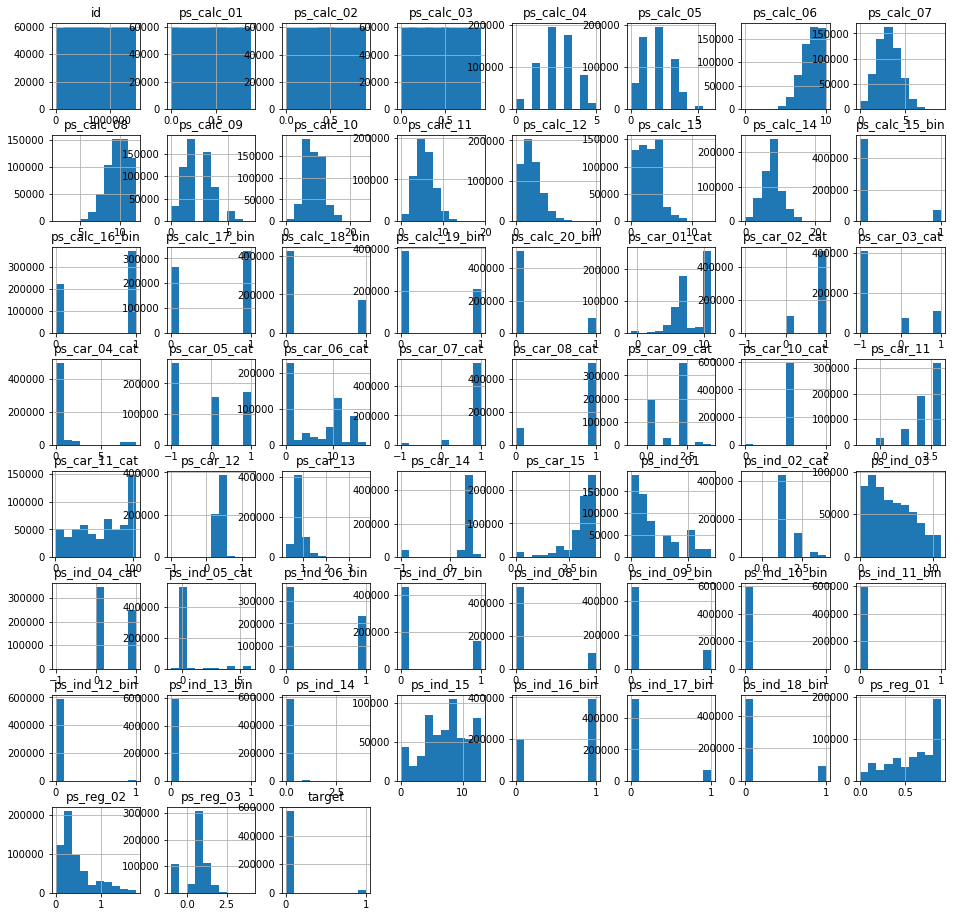

In [65]:
data.hist(figsize=(16, 16));

## The pipeline

For submitting at the [RAMP site](http://ramp.studio), you will have to write two classes, saved in two different files,
* the class `FeatureExtractor`, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples $\times$ number of features), and  
* the class `Classifier` to predict the target.

### Feature extractor

The feature extractor implements a `transform` member function. It is saved in the file [`submissions/starting_kit/feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py). It receives the pandas dataframe `X_df` defined at the beginning of the notebook. It should produce a numpy array representing the extracted features, which will then be used for the classification.  

Note that the following code cells are *not* executed in the notebook. The notebook saves their contents in the file specified in the first line of the cell, so you can edit your submission before running the local test below and submitting it at the RAMP site.

In [38]:
%%file submissions/starting_kit/feature_extractor.py
class FeatureExtractor():
    def __init__(self):
        pass

    def fit(self, X_df, y):
        pass

    def transform(self, X_df):
        return X_df.values



Overwriting submissions/starting_kit/feature_extractor.py


### Classifier

The classifier follows a classical scikit-learn classifier template. It should be saved in the file [`submissions/starting_kit/classifier.py`](/edit/submissions/starting_kit/classifier.py). In its simplest form it takes a scikit-learn pipeline, assigns it to `self.clf` in `__init__`, then calls its `fit` and `predict_proba` functions in the corresponding member funtions.

In [42]:
%%file submissions/starting_kit/classifier.py
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.clf = RandomForestClassifier(
            n_estimators=2, max_leaf_nodes=2, random_state=61)
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)



Overwriting submissions/starting_kit/classifier.py


## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `classifier.py` and `feature_extractor.py` are in the  [`submissions/starting_kit`](/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

Note that `kaggle_data/test.csv` is the actual Kaggle test file, so we have no test labels. To not to crash the test, we mock all 0 labels for the test points. This means that the **test scores are not meaningful** (only he valid scores are).

In [48]:
!ramp_test_submission

Testing Kaggle Porto-Seguro safe driver prediction
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
	train ngini = 0.118
	valid ngini = 0.108
	test ngini = 0.479
	train auc = 0.557
	valid auc = 0.557
	test auc = 0.37
	train acc = 0.964
	valid acc = 0.964
	test acc = 1.0
	train nll = 0.156
	valid nll = 0.156
	test nll = 0.037
CV fold 1
	train ngini = 0.116
	valid ngini = 0.11
	test ngini = 0.479
	train auc = 0.557
	valid auc = 0.557
	test auc = 0.37
	train acc = 0.964
	valid acc = 0.964
	test acc = 1.0
	train nll = 0.156
	valid nll = 0.156
	test nll = 0.037
CV fold 2
	train ngini = 0.132
	valid ngini = 0.123
	test ngini = 0.002
	train auc = 0.565
	valid auc = 0.564
	test auc = 0.25
	train acc = 0.964
	valid acc = 0.964
	test acc = 1.0
	train nll = 0.156
	valid nll = 0.156
	test nll = 0.037
CV fold 3
	train ngini = 0.123
	valid ngini = 0.111
	test ngini = 0.073
	train auc = 0.559
	valid auc = 0.558
	test auc = 0.268
	train acc 

You can use the `--quick-test` switch to test the notebook on the mock data sets in `data/`. Since the data is random, the scores will not be meaningful, but it can be useful to run this first on your submissions to make sure they run without errors.

In [49]:
!ramp_test_submission --quick-test

Testing Kaggle Porto-Seguro safe driver prediction
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
	train ngini = 0.175
	valid ngini = 0.109
	test ngini = 0.879
	train auc = 0.649
	valid auc = 0.509
	test auc = 0.47
	train acc = 0.965
	valid acc = 0.965
	test acc = 0.99
	train nll = 0.171
	valid nll = 0.201
	test nll = 0.066
CV fold 1
	train ngini = 0.251
	valid ngini = 0.155
	test ngini = 0.879
	train auc = 0.663
	valid auc = 0.486
	test auc = 0.47
	train acc = 0.965
	valid acc = 0.965
	test acc = 0.99
	train nll = 0.146
	valid nll = 0.164
	test nll = 0.059
CV fold 2
	train ngini = 0.395
	valid ngini = 0.021
	test ngini = 0.798
	train auc = 0.717
	valid auc = 0.543
	test auc = 0.449
	train acc = 0.965
	valid acc = 0.965
	test acc = 0.99
	train nll = 0.137
	valid nll = 0.156
	test nll = 0.069
CV fold 3
	train ngini = 0.322
	valid ngini = 0.36
	test ngini = 0.455
	train auc = 0.645
	valid auc = 0.654
	test auc = 0.364
	train 

## Other models in the starting kit

You can also keep several other submissions in your work directory [`submissions`](/tree/submissions) and test them using
```
ramp_test_submission --submission <submission_name>
```
where `<submission_name>` is the name of the folder in `submissions/`.

## Submitting to Kaggle

You can use this starting kit to train models and submit their predictions to Kaggle. `problem.save_y_pred` implements outputting the predictions. You can turn on this using the `--save-y-preds` switch:
```
ramp_test_submission --submission <submission_name> --save-y-preds
```
This will create the arborescence
```
submissions/<submission_name>/training_output
├── bagged_test_scores.csv
├── bagged_train_valid_scores.csv
├── fold_0
│   └── y_pred_test.csv
├── ...
├── fold_<k-1>
│   └── y_pred_test.csv
└── y_pred_bagged_test.csv
```
You can find test prediction vectors in each fold folder `submissions/<submission_name>/training_output/fold_<i>` and the bagged prediction vector **`submissions/<submission_name>/training_output/y_pred_bagged_test.csv`**. It is this latter that you should submit to Kaggle.

If your goal is to use this starting kit to optimize your Kaggle submission, besides optimizing your feature extractor and classifier, you can also tune the CV bagging scheme by changing the type of cross validation, the number of folds, and the test proportion in `problem.get_cv`. We found that `test_size=0.5` worked well with an extreme large number of folds, typically `n_splits=64`, but these parameters depend on the classifier you are testing, so may need fine tuning. 

## Submitting to [ramp.studio](http://ramp.studio)

If you are eligible, you can join the team at [ramp.studio](http://www.ramp.studio). First, if it is your first time using RAMP, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login). Then ask for a sign-up to the event [kaggle_seguro](http://www.ramp.studio/events/kaggle_seguro). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](http://www.ramp.studio/events/kaggle_seguro/sandbox) and copy-paste (or upload) [`feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py) and [`classifier.py`](/edit/submissions/starting_kit/classifier.py) from `submissions/starting_kit`. Save it, rename it, then submit it. The submission is trained and tested on our backend in the same way as `ramp_test_submission` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](http://www.ramp.studio/events/kaggle_seguro/my_submissions). Once it is trained, you get a mail, and your submission shows up on the [public leaderboard](http://www.ramp.studio/events/kaggle_seguro/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in [my submissions](http://www.ramp.studio/events/kaggle_seguro/my_submissions). You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation and test scores 
```
----------------------------
train ngini = 0.119 ± 0.007
train auc = 0.559 ± 0.003
train acc = 0.964 ± 0.0
train nll = 0.156 ± 0.0
valid ngini = 0.114 ± 0.005
valid auc = 0.558 ± 0.002
valid acc = 0.964 ± 0.0
valid nll = 0.156 ± 0.0
test ngini = 0.229 ± 0.256
test auc = 0.307 ± 0.064
test acc = 1.0 ± 0.0
test nll = 0.037 ± 0.0
```
and bagged cross-validation and test scores
```
valid ngini = 0.167
test ngini = -0.324
```
This latter combines the cross-validation models pointwise on the validation and test sets, and usually leads to a better score than the mean CV score. The RAMP [leaderboard](http://www.ramp.studio/events/kaggle_seguro/leaderboard) displays this score.

The official score in this RAMP (the first score column after "historical contributivity" on the [leaderboard](http://www.ramp.studio/events/kaggle_seguro/leaderboard)) is normalized Gini ("ngini"), so the line that is relevant in the output of `ramp_test_submission` is `valid ngini = 0.167`. When the score is good enough, you can submit it at the RAMP.

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

## Contact

Don't hesitate to [contact us](mailto:admin@ramp.studio?subject=kaggle seguro notebook).